In [ ]:
!touch to_file_in_tmpfs.txt
!touch to_file.txt
!touch to_string_from_pipe.txt
!touch to_string_from_syscalls.txt
!touch to_file_in_tmpfs_through_pipe.txt
!touch to_file_through_pipe.txt

File in TMPFS

In [32]:
import matplotlib.pyplot as plt


def build_plot(filename: str, name: str):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Разделение данных на списки для x (i), y1 (cpu_time) и y2 (real_time)
    x = []
    y1 = []
    y2 = []
    for line in lines:
        data = line.split()
        x.append(int(data[0]))
        y1.append(int(data[1]))
        y2.append(int(data[2]))

    # Построение графика
    plt.plot(x, y1, label='cpu_time')
    plt.plot(x, y2, label='real_time')
    plt.xlabel('Input size (bytes)')
    plt.ylabel('Time (ms)')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()

def build_global_plot(filenames: list[tuple[str, str]], mode: int, name: str = "CPU time comparison"):
    data = {}
    for filename, axis_name in filenames:
      with open(filename, 'r') as f:
          data[axis_name] = {}
          data[axis_name]["lines"] = f.readlines()
          data[axis_name]["points"] = []

    # Разделение данных на списки для x (i), y1 (cpu_time) и y2 (real_time)
    x = []
    for i, line in enumerate(data[filenames[0][1]]["lines"]):
        data_ = line.split()
        x.append(int(data_[0]))
        # print(data)
        for filename, axis_name in filenames:
            if len(data[axis_name]["lines"]) == i: continue
            data[axis_name]["points"].append(int(
                data[axis_name]["lines"][i].split()[mode]
            ))

    # Построение графика
    print(data)
    for filename, axis_name in filenames:
        plt.plot(x, data[axis_name]["points"], label=axis_name)
    plt.xlabel('Input size (bytes)')
    plt.ylabel('Time (ms)')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()


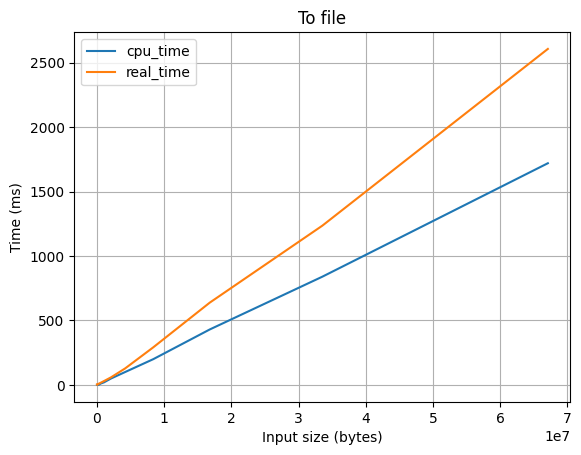

In [ ]:
build_plot("to_file.txt", "To file")

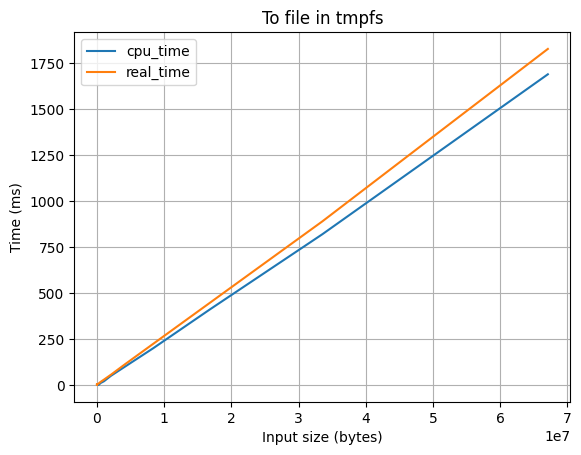

In [ ]:
build_plot("to_file_in_tmpfs.txt", "To file in tmpfs")

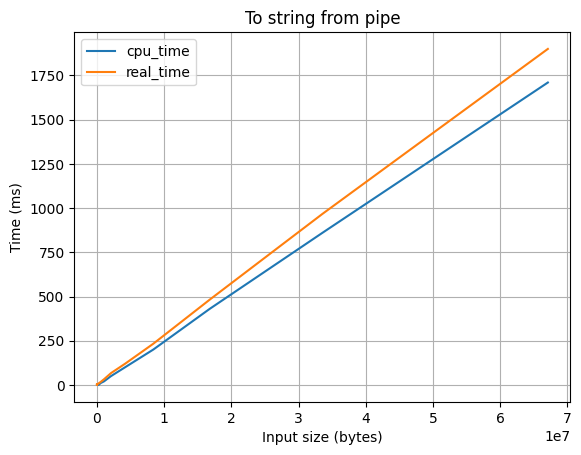

In [ ]:
build_plot("to_string_from_pipe.txt", "To string from pipe")

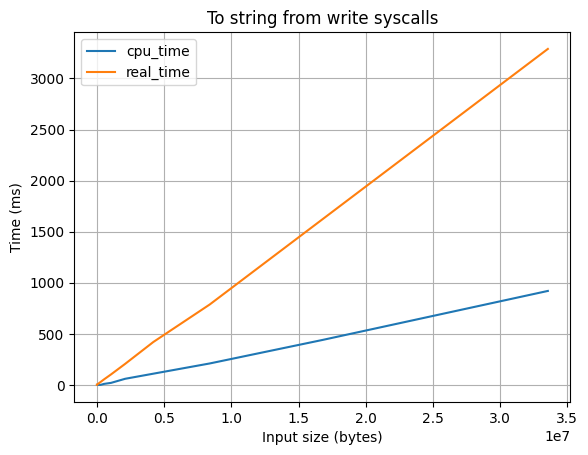

In [ ]:
build_plot("to_string_from_syscalls.txt", "To string from write syscalls")

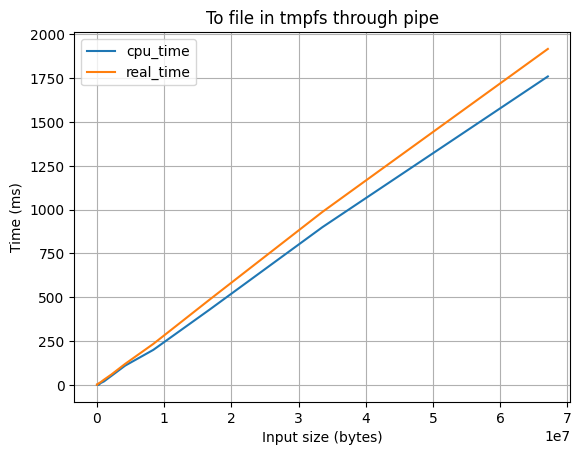

In [ ]:
build_plot("to_file_in_tmpfs_through_pipe.txt", "To file in tmpfs through pipe")

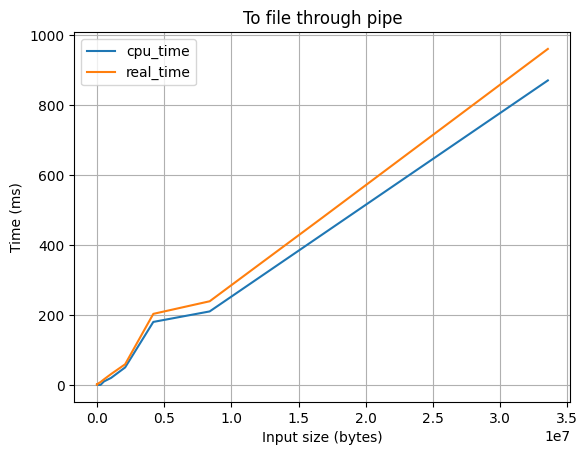

In [15]:
build_plot("to_file_through_pipe.txt", "To file through pipe")

{'To file': {'lines': ['1 0 3\n', '2 0 1\n', '4 0 1\n', '8 0 1\n', '16 0 1\n', '32 0 1\n', '64 0 1\n', '128 0 1\n', '256 0 1\n', '512 0 1\n', '1024 0 1\n', '2048 0 1\n', '4096 0 1\n', '8192 0 1\n', '16384 0 2\n', '32768 0 2\n', '65536 0 3\n', '131072 0 4\n', '262144 0 9\n', '524288 10 16\n', '1048576 20 30\n', '2097152 50 59\n', '4194304 100 128\n', '8388608 200 292\n', '16777216 430 638\n', '33554432 840 1236\n', '67108864 1720 2607\n'], 'points': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 20, 50, 100, 200, 430, 840, 1720]}, 'To file in tmpfs': {'lines': ['1 0 3\n', '2 0 1\n', '4 0 1\n', '8 0 1\n', '16 0 1\n', '32 0 1\n', '64 0 1\n', '128 0 1\n', '256 0 1\n', '512 0 1\n', '1024 0 2\n', '2048 0 1\n', '4096 0 1\n', '8192 0 1\n', '16384 0 1\n', '32768 0 2\n', '65536 0 3\n', '131072 0 5\n', '262144 0 8\n', '524288 10 16\n', '1048576 20 29\n', '2097152 50 56\n', '4194304 100 113\n', '8388608 200 224\n', '16777216 410 446\n', '33554432 820 890\n', '67108864 1690 1828\n'],

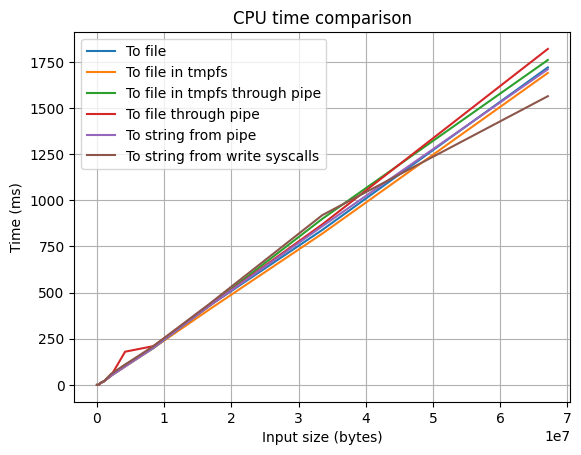

In [31]:
build_global_plot(filenames=[
    ("to_file.txt", "To file"),
    ("to_file_in_tmpfs.txt", "To file in tmpfs"),
    ("to_file_in_tmpfs_through_pipe.txt", "To file in tmpfs through pipe"),
    ("to_file_through_pipe.txt", "To file through pipe"),
    ("to_string_from_pipe.txt", "To string from pipe"),
    ("to_string_from_syscalls.txt", "To string from write syscalls")
], mode=1)

{'To file': {'lines': ['1 0 3\n', '2 0 1\n', '4 0 1\n', '8 0 1\n', '16 0 1\n', '32 0 1\n', '64 0 1\n', '128 0 1\n', '256 0 1\n', '512 0 1\n', '1024 0 1\n', '2048 0 1\n', '4096 0 1\n', '8192 0 1\n', '16384 0 2\n', '32768 0 2\n', '65536 0 3\n', '131072 0 4\n', '262144 0 9\n', '524288 10 16\n', '1048576 20 30\n', '2097152 50 59\n', '4194304 100 128\n', '8388608 200 292\n', '16777216 430 638\n', '33554432 840 1236\n', '67108864 1720 2607\n'], 'points': [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 9, 16, 30, 59, 128, 292, 638, 1236, 2607]}, 'To file in tmpfs': {'lines': ['1 0 3\n', '2 0 1\n', '4 0 1\n', '8 0 1\n', '16 0 1\n', '32 0 1\n', '64 0 1\n', '128 0 1\n', '256 0 1\n', '512 0 1\n', '1024 0 2\n', '2048 0 1\n', '4096 0 1\n', '8192 0 1\n', '16384 0 1\n', '32768 0 2\n', '65536 0 3\n', '131072 0 5\n', '262144 0 8\n', '524288 10 16\n', '1048576 20 29\n', '2097152 50 56\n', '4194304 100 113\n', '8388608 200 224\n', '16777216 410 446\n', '33554432 820 890\n', '67108864 1690 1828\n']

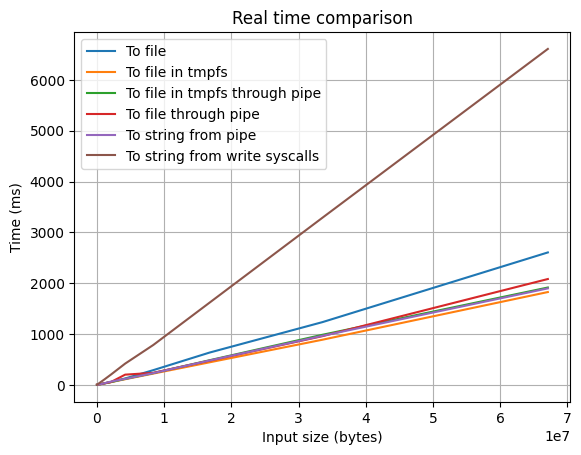

In [33]:
build_global_plot(filenames=[
    ("to_file.txt", "To file"),
    ("to_file_in_tmpfs.txt", "To file in tmpfs"),
    ("to_file_in_tmpfs_through_pipe.txt", "To file in tmpfs through pipe"),
    ("to_file_through_pipe.txt", "To file through pipe"),
    ("to_string_from_pipe.txt", "To string from pipe"),
    ("to_string_from_syscalls.txt", "To string from write syscalls")
], mode=2, name="Real time comparison")